

Before starting, read the README.txt file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $ \hat{y} = f(x) = \beta_0 + \beta_1 x $ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the obtained regression line with the data .
    
I recommend you to use the given learning rate and number of iterations in the code , but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [2]:
def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    print(type(y))
    return x, y


def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    #beta1 = (y[1]-y[2])/(x[1]-x[2])
    #beta0 = y[1] - (beta1*x[1])
    beta0 = 0
    beta1 = 0
    
    n = float(len(y))

    # start gradient descent loop
    for k in range(0,max_its):
        # TO DO: calculate derivative (grad)
        y_pred = beta0 + (beta1*x)
        
        
        D_beta1 = (-2/n)*sum(x*(y - y_pred))
        D_beta0 = (-2/n)*sum(y-y_pred)
        
        
        # TO DO: take gradient descent step
        ...
        beta1 = beta1 - (learning_rate*D_beta1)
        beta0 = beta0 - (learning_rate*D_beta0)
        
        # TO DO: calculate and print the loss value
        ...
        loss_value = sum(y-y_pred)/n
        if k%20==0:
            print(loss_value)

    return beta0, beta1

<class 'numpy.ndarray'>
1.6945229448216133
0.0033163949665123617
-0.0031536406947462268
-0.0024626257299801145
-0.0019035972388360633
-0.001471386896003777
-0.0011373092231200177
-0.0008790837203566104
-0.0006794881916706208
-0.0005252107301365916
-0.0004059618907762408
-0.0003137884420595061
-0.00024254292978566295
-0.00018747367622229838
-0.00014490786974251434
-0.00011200660880185787
-8.657556306380876e-05
-6.691862382005365e-05
-5.172478301635142e-05
-3.99806963345517e-05
-3.090309878921893e-05
-2.3886565326014518e-05
-1.846313235337682e-05
-1.4271087184045683e-05
-1.1030843819814784e-05


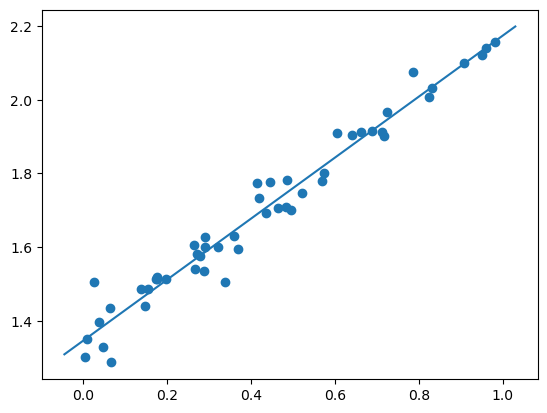

In [3]:
x, y = load_data()
beta0, beta1 = gradient_descent(x, y)
plt.scatter(x, y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta0 + beta1 * x_vals
plt.plot(x_vals, y_vals, '-')
plt.show()


# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, I am giving you only the load_data function, It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
def load_data():
    data= fetch_california_housing()
    print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    print("Shape of the X: ", data.data.shape)
    print("Shape of the Y: ", data.target.shape)
    return data.data, data.target



def multiple_gradient_descent_KFold(X,Y, learning_rate=0.0000001):
    kf = KFold(n_splits=4)
    np.random.seed(0)
    
    
    
  #  print(beta1 + 1);
    for i in X:
        if np.isnan(i.any()):
            print(i)
    for xtrain_index, xtest_index in kf.split(X,Y):
        
        X_train, X_test = X[xtrain_index], X[xtest_index]
        y_train, y_test = Y[xtrain_index], Y[xtest_index]
        beta1=np.random.rand(X_train.shape[1])
        D_beta1 = beta1
        beta0=0
        print(f'Shape of Xtrain: {X_train.shape}')
        print(f'Shape of Ytrain: {y_train.shape}')
        print(f'Shape of Xtest: {X_test.shape}')        
        print(f'Shape of Ytest: {y_test.shape}')
        print(f'shape of beta1.T: {beta1.T.shape} and X_train.T: {X_train.T.shape}')
        
        for k in range(0,200):
            y_pred = beta1[0]*X_train[:,0] + beta1[1]*X_train[:,1] + beta1[2]*X_train[:,2] +beta1[3]*X_train[:,3] +beta1[4]*X_train[:,4] +beta1[5]*X_train[:,5] +beta1[6]*X_train[:,6] +beta1[7]*X_train[:,7] +beta0
        # Y_pred = np.dot(X_train,beta1) + beta0
            #print(f'shape of ypred: {y_pred.shape} and Y_train: {y_train}')
            n = float(len(y_train))
            D_beta0 = -2*np.mean(y_train - y_pred)
            D_beta1[0] = -2*np.sum(X_train[:,0]*(y_train-y_pred))/n
            D_beta1[1] = -2*np.sum(X_train[:,1]*(y_train-y_pred))/n
            D_beta1[2] = -2*np.sum(X_train[:,2]*(y_train-y_pred))/n
            D_beta1[3] = -2*np.sum(X_train[:,3]*(y_train-y_pred))/n
            D_beta1[4] = -2*np.sum(X_train[:,4]*(y_train-y_pred))/n
            D_beta1[5] = -2*np.sum(X_train[:,5]*(y_train-y_pred))/n
            D_beta1[6] = -2*np.sum(X_train[:,6]*(y_train-y_pred))/n
            D_beta1[7] = -2*np.sum(X_train[:,7]*(y_train-y_pred))/n
            
            beta1 = beta1 + (learning_rate*D_beta1)
            beta0 = beta0 + (learning_rate*D_beta0)
            
            
            
            if k%20==0:
                print(f'Beta1: {beta1}')
                loss_value = np.mean((y_train-y_pred)**2)
                print(f'The mean of ytrain is {np.mean(y_train)} and y_pred is {np.mean(y_pred)} and the mean of delta is {np.mean(D_beta1)}')
                if(k!=0):
                    print(f'{200 - 200/k} : {loss_value} \n')
                else:
                    print(f'1. {loss_value}\n')
        
       # D_beta1 = (-2/n)*sum(X_train.T.dot(y_train-Y_pred))
       # D_beta0 = (-2/n)*sum(y_train - Y_pred)
        
       # beta1 = beta1 - (learning_rate*D_beta1)
       # beta0 = beta0 - (learning_rate*D_beta0)
       
        
        # TO DO: calculate and print the loss value
        #...
        #loss_value = sum(y_train-Y_pred)/n
        #if k%20==0:
        #    print(loss_value)
            
   
    

import os, ssl
#if(not os.environ.get('PYTHONHTTPSVERIFY','') and getattr(ssl, '_create_unverified_context', None)):
#    ssl._create_default_https_context = ssl._create_unverified_context

x, y = load_data()
multiple_gradient_descent_KFold(x, y)

Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)
Shape of Xtrain: (15480, 8)
Shape of Ytrain: (15480,)
Shape of Xtest: (5160, 8)
Shape of Ytest: (5160,)
shape of beta1.T: (8,) and X_train.T: (8, 15480)
Beta1: [ 4.40986922e+03  2.70771607e+04  5.90982961e+03  1.18036019e+03
  2.79622575e+06  4.36020526e+03  3.88863550e+04 -1.31595421e+05]
The mean of ytrain is 2.1729649489664085 and y_pred is 554.0512557816477 and the mean of delta is 343306.729783515
1. 555389.6882363965

Beta1: [ 2.06236803e+08  1.27545324e+09  2.76844361e+08  5.52809035e+07
  1.24808344e+11  1.92247596e+08  1.81866294e+09 -6.15199284e+09]
The mean of ytrain is 2.1729649489664085 and y_pred is 106929806233535.5 and the mean of delta is 6.346322860594914e+16
190.0 : 1.8954386825247477e+28 

Beta1: [ 9.20645433e+12  5.69365106e+13  1.23583910e+13  2.46775125e+12
  5.57146491

Beta1: [ 9.18111015e+12  6.16595028e+13  1.26284446e+13  2.58412480e+12
  5.78001869e+15  7.90656516e+12  8.40008697e+13 -2.85582660e+14]
The mean of ytrain is 1.990083545865633 and y_pred is 4.949858872762398e+18 and the mean of delta is 2.920867060440188e+21
195.0 : 4.0577780245837173e+37 

Beta1: [ 3.75387258e+17  2.52106677e+18  5.16338126e+17  1.05656888e+17
  2.36327125e+20  3.23275048e+17  3.43453631e+18 -1.16765936e+19]
The mean of ytrain is 1.990083545865633 and y_pred is 2.0238445259166284e+23 and the mean of delta is 1.194252394493551e+26
196.66666666666666 : 6.78354866808542e+46 

Beta1: [ 1.53484264e+22  1.03078639e+23  2.11114724e+22  4.31998405e+21
  9.66268678e+24  1.32177190e+22  1.40427590e+23 -4.77419874e+23]
The mean of ytrain is 1.990083545865633 and y_pred is 8.27487564872039e+27 and the mean of delta is 4.882929459783909e+30
197.5 : 1.1340327699912632e+56 

Beta1: [ 6.27549787e+26  4.21456743e+27  8.63182951e+26  1.76630815e+26
  3.95077440e+29  5.40431735e+26  5

In [17]:
data= fetch_california_housing()
print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
print("Shape of the X: ", data.data.shape)
print("Shape of the Y: ", data.target.shape)


Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)


In [6]:
kf = KFold(n_splits=5)

In [7]:
for datax, targets in kf.split(data.data, data.target):
    #print(data.data[datax[:targets.size],1].shape)
    print(datax.size/4)
    print(data.target[targets].shape)
    print(datax[:targets.size].shape)
   # print(datax[(np.ceil(datax.size-1)/2)])
    print(targets)

4128.0
(4128,)
(4128,)
[   0    1    2 ... 4125 4126 4127]
4128.0
(4128,)
(4128,)
[4128 4129 4130 ... 8253 8254 8255]
4128.0
(4128,)
(4128,)
[ 8256  8257  8258 ... 12381 12382 12383]
4128.0
(4128,)
(4128,)
[12384 12385 12386 ... 16509 16510 16511]
4128.0
(4128,)
(4128,)
[16512 16513 16514 ... 20637 20638 20639]


In [8]:
df = pd.read_csv('data1.csv')
print(df['x'].shape)
print(df['y'].shape)

(50,)
(50,)


In [15]:
data.features

AttributeError: features